In [1]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
filename = r'./data/difficulty_0/elapseTime.csv' 
df = pd.read_csv(filename)
df

block_height   elapsed_time
0               1   7.316676514s
1               2  11.003843287s
2               3   4.328458786s
3               4   1.741165281s
4               5   4.053125197s
..            ...            ...
609           610   8.099648354s
610           611   2.641351722s
611           612   2.339239952s
612           613   9.710148801s
613           614  36.585247996s

[614 rows x 2 columns]

In [6]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)



Elasped time :  7.316676514s
Elasped time :  11.003843287s
Elasped time :  4.328458786s
Elasped time :  1.741165281s
Elasped time :  4.053125197s
Elasped time :  20.00539701s
Elasped time :  44.973378685s
Elasped time :  1.133278514s
Elasped time :  28.369379577s
Elasped time :  5.456660842s
Elasped time :  17.522617357s
Elasped time :  391.424429ms
Elasped time :  11.671318779s
Elasped time :  4.758576897s
Elasped time :  15.012218919s
Elasped time :  3.985192228s
Elasped time :  7.597817772s
Elasped time :  1m2.298253537s
Elasped time :  43.891977546s
Elasped time :  2.838281573s
Elasped time :  599.351312ms
Elasped time :  33.436355996s
Elasped time :  9.474086033s
Elasped time :  3.970293442s
Elasped time :  40.225567172s
Elasped time :  31.171342318s
Elasped time :  2.04556716s
Elasped time :  19.147933879s
Elasped time :  7.422820475s
Elasped time :  6.880478815s
Elasped time :  927.006667ms
Elasped time :  10.26477465s
Elasped time :  10.378584605s
Elasped time :  19.95440049s
E

In [7]:
df

block_height  elapsed_time
0               1   7.316676514
1               2  11.003843287
2               3   4.328458786
3               4   1.741165281
4               5   4.053125197
..            ...           ...
609           610   8.099648354
610           611   2.641351722
611           612   2.339239952
612           613   9.710148801
613           614  36.585247996

[614 rows x 2 columns]

In [69]:
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0       544.210908064
1       804.729855279
2       747.703627735
3       4091.81745355
4       409.863418937
            ...      
178    2124.130560481
179     709.344330565
180    1062.377840019
181     333.764112353
182     333.916810556
Name: elapsed_time, Length: 183, dtype: object

In [104]:
arr = df['elapsed_time'].astype(float)
arr.mean()
mean = pd.Series(arr.mean(), index=list(x))
mean

1      636.981824
2      636.981824
3      636.981824
4      636.981824
5      636.981824
          ...    
179    636.981824
180    636.981824
181    636.981824
182    636.981824
183    636.981824
Length: 183, dtype: float64

In [105]:
df.to_csv('block_generation_time2.csv', encoding='cp949')

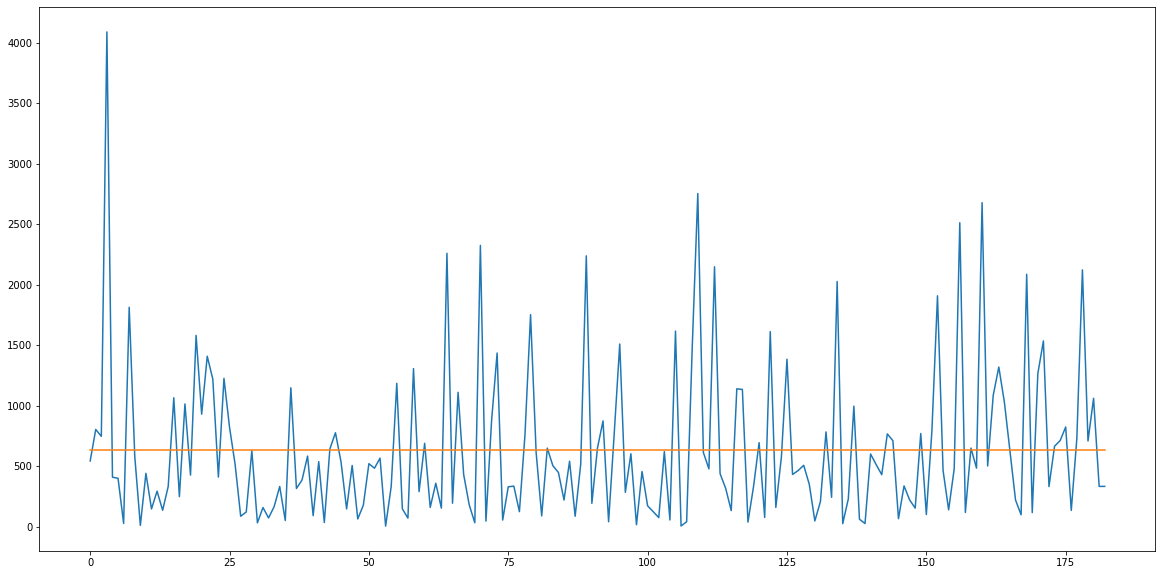

In [107]:
frame = frame.astype(float)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(frame)
ax1.plot(x-1, mean) 
#frame.plot(figsize=(10,10))


In [108]:
import numpy as np
log_frame = np.log(frame)

In [109]:
frame

0       544.210908
1       804.729855
2       747.703628
3      4091.817454
4       409.863419
          ...     
178    2124.130560
179     709.344331
180    1062.377840
181     333.764112
182     333.916811
Name: elapsed_time, Length: 183, dtype: float64

In [110]:
log_frame

0      6.299337
1      6.690507
2      6.617007
3      8.316745
4      6.015824
         ...   
178    7.661118
179    6.564341
180    6.968265
181    5.810434
182    5.810892
Name: elapsed_time, Length: 183, dtype: float64

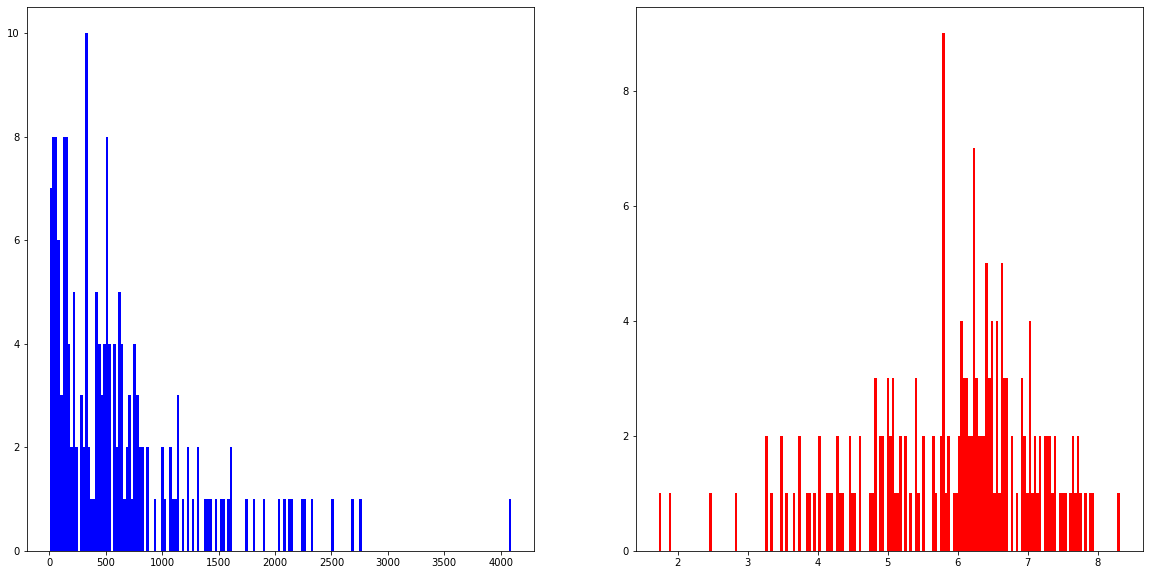

In [111]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, color='r')
plt.show()

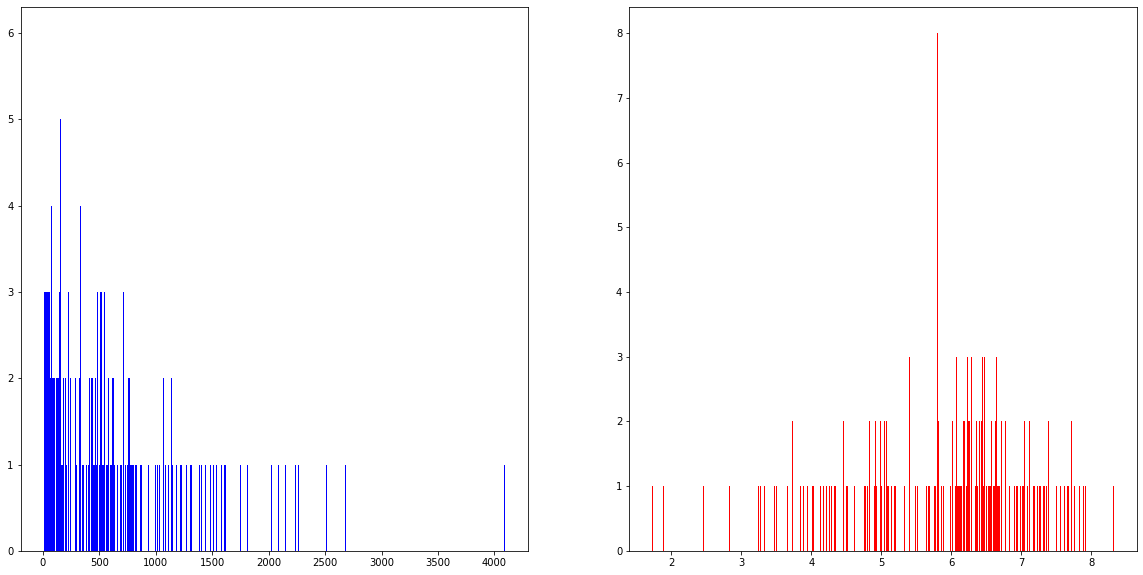

In [112]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=500, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=500, color='r')
plt.show()

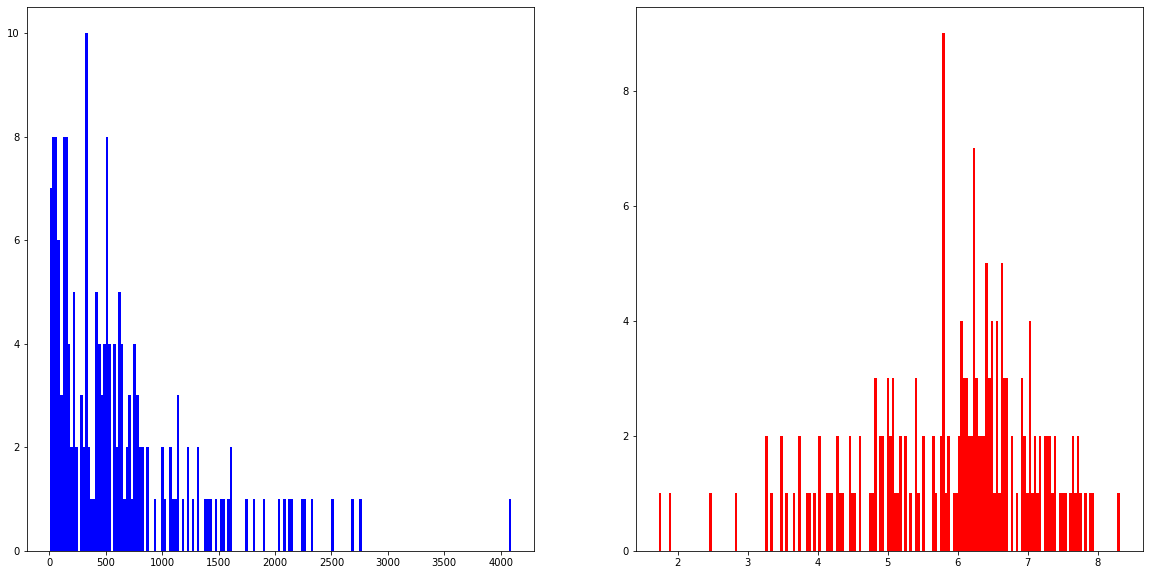

In [113]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, color='r')
plt.show()

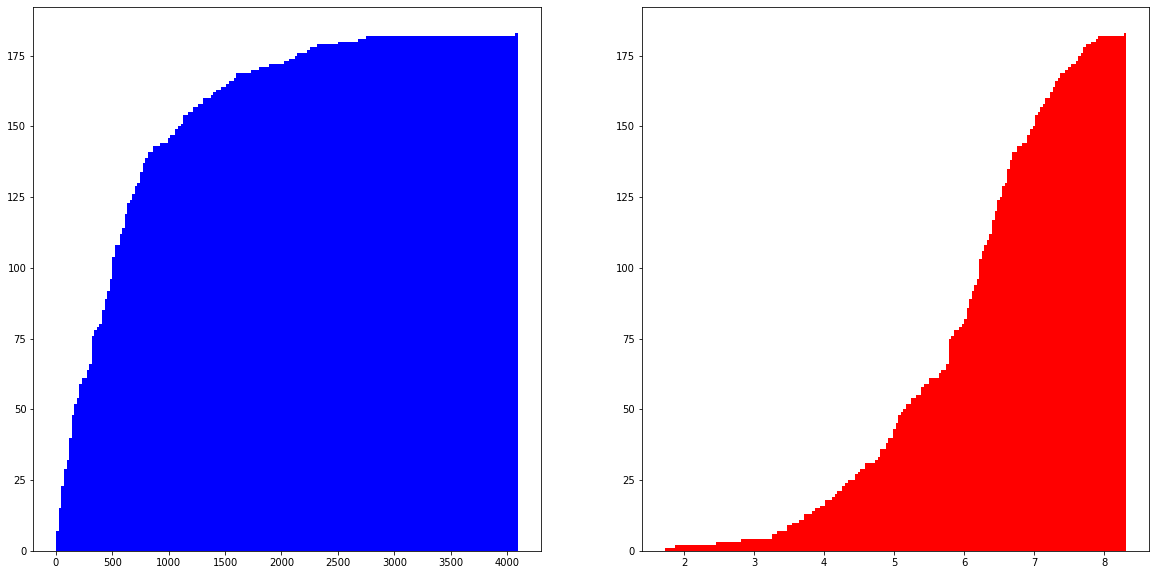

In [114]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.hist(frame, bins=182, cumulative = True, color='b')
plt.subplot(1,2,2)
plt.hist(log_frame, bins=182, cumulative = True, color='r')
plt.show()